# Predictive Analysis For Distribution Bussines

### --> The dataset contains information about the sales and transactions of a cheese distribution company, including 
#### Date, Customer code, Address of customer,
#### Item code, Name of Products,
#### Price of carton,
#### Total cartons ordered,
#### Total pieces ordered,
#### Total discount given,
#### Net value generated on a order,
#### Total number of pieces in a carton,
#### Price per piece,
#### Discount per piece,
#### Day,
#### Week,
#### Month,
#### Year,
#### Has discount or not,
#### Purchase price of the carton,
#### Profit per order,
#### Total number of pieces ordered in one month,
#### Season,
#### Total number of pieces ordered in one week.

## Importing dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("distribution_business.csv")
df.head()

,INV,INVOICE,C/CODE,CUSTOMER NAME,CUSTOMER ADDRESS,ITEM,ITEMS NAME,CTN RATE,QUANTITY,Unnamed: 9,T/O,NET VALUE
0,#,DATE,NaN,NAME,NaN,CODE,NaN,NaN,CTN,PCS,NaN,NaN
1,3,10-Sep-21,9295.0,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500.0,1,0,1000.0,13500.0
2,3,10-Sep-21,9295.0,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250.0,0,5,375.0,9250.0
3,4,10-Sep-21,8992.0,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500.0,0,2,200.0,2700.0
4,4,10-Sep-21,8992.0,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250.0,0,2,150.0,3700.0


In [3]:
df = pd.read_csv('distribution_business.csv',header=1,names=["No","Date","C_id","Customer_name","Customer_address","I_code","Product_name","CTN_price","CTN","PCS","Total_discount","Net_value"],parse_dates=["Date"])
df.head()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9084\2161219627.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('distribution_business.csv',header=1,names=["No","Date","C_id","Customer_name","Customer_address","I_code","Product_name","CTN_price","CTN","PCS","Total_discount","Net_value"],parse_dates=["Date"])


,No,Date,C_id,Customer_name,Customer_address,I_code,Product_name,CTN_price,CTN,PCS,Total_discount,Net_value
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,0,1000,13500.0
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250.0
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700.0
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0


## Understanding & Preporcessing

In [4]:
df = df.drop("No", axis=1)

In [5]:
df = df.drop(df['Net_value'].nsmallest(11).index)

min_rows = df.nsmallest(5, ['Net_value'])

# Print the resulting dataframe
print(min_rows)

          Date  C_id                  Customer_name      Customer_address   
92  2021-09-14  2132                  FREE SAMPLING                   NaN  \
192 2021-09-21  9556                      EASY MART         ZANGAL MARKET   
216 2021-09-21  8898                 SS SUPER STORE  COL SHER KHAN MARKET   
291 2021-09-25  2025                        GUL G/S         Behram Market   
429 2021-10-02  9031  UNIVERSITY BAKERS 03335992712   PESHAWAR UNIVERSITY   

     I_code               Product_name  CTN_price  CTN  PCS  Total_discount   
92     1763  DEEN'S SLICE CHEESE 200GM      23600    0    1               0  \
192    1763  DEEN'S SLICE CHEESE 200GM      23600    0    1               0   
216    1763  DEEN'S SLICE CHEESE 200GM      23600    0    1               0   
291    1763  DEEN'S SLICE CHEESE 200GM      23600    0    1               0   
429    1763  DEEN'S SLICE CHEESE 200GM      23600    0    1               0   

     Net_value  
92       295.0  
192      295.0  
216      29

In [6]:
df = df.drop(df['Total_discount'].nsmallest(2).index)

min_rows = df.nsmallest(5, ['Total_discount'])
#df = df.drop(min_rows.index)

# Print the resulting dataframe
print(min_rows)

         Date  C_id        Customer_name Customer_address  I_code   
6  2021-09-11  6544              CHATRAL           CAMPUS    1758  \
7  2021-09-11  6544              CHATRAL           CAMPUS    1760   
8  2021-09-11  6544              CHATRAL           CAMPUS    1762   
9  2021-09-11  6544              CHATRAL           CAMPUS    1763   
10 2021-09-11  3467  IQRA SWEET & BAKERS           CAMPUS    1758   

                 Product_name  CTN_price  CTN  PCS  Total_discount  Net_value  
6        DEEN'S CHEDDAR 200GM      20150    0    4               0     1240.0  
7      DEEN'S MOZARELLA 200GM      22425    0    6               0     2070.0  
8   DEEN'S PIZZA CHEESE 200GM      24050    0    2               0      740.0  
9   DEEN'S SLICE CHEESE 200GM      23600    0    2               0      590.0  
10       DEEN'S CHEDDAR 200GM      20150    0    1               0      310.0  


In [7]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 7282
Number of columns: 11


In [8]:
print(df.nunique())

Date                373
C_id                221
Customer_name       214
Customer_address    131
I_code               14
Product_name         16
CTN_price            43
CTN                  11
PCS                  24
Total_discount      336
Net_value           731
dtype: int64


In [9]:
df.describe()

,Date,C_id,I_code,CTN_price,CTN,PCS,Total_discount,Net_value
count,7282,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000
mean,2022-04-06 11:03:14.781653248,5189.002060,1764.258857,23851.971024,0.142131,3.148860,185.013321,5010.439247
min,2021-09-10 00:00:00,2005.000000,1758.000000,14400.000000,0.000000,0.000000,0.000000,295.000000
25%,2021-12-23 00:00:00,2136.000000,1760.000000,21180.000000,0.000000,2.000000,0.000000,902.000000
50%,2022-03-30 00:00:00,3403.000000,1763.000000,23725.000000,0.000000,2.000000,0.000000,1500.000000
75%,2022-07-18 00:00:00,9024.000000,1770.000000,26650.000000,0.000000,4.000000,90.000000,2904.000000
max,2022-12-03 00:00:00,9965.000000,1788.000000,36006.000000,12.000000,65.000000,24220.000000,258600.000000
std,NaN,3348.983995,5.410203,4821.487524,0.875108,3.310566,927.670823,17730.800894


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7282 entries, 0 to 7294
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7282 non-null   datetime64[ns]
 1   C_id              7282 non-null   int64         
 2   Customer_name     7282 non-null   object        
 3   Customer_address  7033 non-null   object        
 4   I_code            7282 non-null   int64         
 5   Product_name      7282 non-null   object        
 6   CTN_price         7282 non-null   int64         
 7   CTN               7282 non-null   int64         
 8   PCS               7282 non-null   int64         
 9   Total_discount    7282 non-null   int64         
 10  Net_value         7282 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 682.7+ KB


In [11]:
df.isnull().sum()

Date                  0
C_id                  0
Customer_name         0
Customer_address    249
I_code                0
Product_name          0
CTN_price             0
CTN                   0
PCS                   0
Total_discount        0
Net_value             0
dtype: int64

In [12]:
df.dropna(subset=['Customer_address'], inplace=True)

In [13]:
df.isnull().sum()

Date                0
C_id                0
Customer_name       0
Customer_address    0
I_code              0
Product_name        0
CTN_price           0
CTN                 0
PCS                 0
Total_discount      0
Net_value           0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
print(df.dtypes)

Date                datetime64[ns]
C_id                         int64
Customer_name               object
Customer_address            object
I_code                       int64
Product_name                object
CTN_price                    int64
CTN                          int64
PCS                          int64
Total_discount               int64
Net_value                  float64
dtype: object


In [17]:
print(df["Product_name"].unique())

["DEEN'S CHADDER CHEESE BLOCK 2K" "DEEN'S MOZRELLA CHEESE BLOCK"
 "DEEN'S CHEDDAR 200GM" "DEEN'S MOZARELLA 200GM"
 "DEEN'S PIZZA CHEESE 200GM" "DEEN'S SLICE CHEESE 200GM"
 "DEEN'S CHEDDAR 400GM" "DEEN'S MOZARELLA 400GM"
 "DEEN'S SLICE CHEESE 1 KG" 'w4-Dyh SLICE CHEESE 1 KG'
 'DEEN SLICE CHEESE 1 KG' 'DEENS CHADDER 140G' 'DEENS CHADDER 907G'
 'DEENS MOZRELLA 140G' 'DEENS PIZZA 400G' 'DEENS SLICE 250G']


In [18]:
print(df["CTN"].value_counts())

CTN
0     6737
1      102
5       43
2       41
4       27
3       19
10      18
6       16
7       12
8        7
12       1
Name: count, dtype: int64


## Creating new possible features 

In [19]:
count_10 = (df['PCS'] == 10).sum()
print(f"There are {count_10} rows with a value of 10 in the 'PCS' column.")

There are 33 rows with a value of 10 in the 'PCS' column.


In [20]:
product_quantities = {
    "DEEN'S CHADDER CHEESE BLOCK 2K": 10,
    "DEEN'S MOZRELLA CHEESE BLOCK": 10,
    "DEEN'S CHEDDAR 200GM": 72,
    "DEEN'S MOZARELLA 200GM": 72,
    "DEEN'S PIZZA CHEESE 200GM": 72,
    "DEEN'S SLICE CHEESE 200GM": 80,
    "DEEN'S CHEDDAR 400GM": 36,
    "DEEN'S MOZARELLA 400GM": 36,
    "DEEN'S SLICE CHEESE 1 KG": 16,
    "w4-Dyh SLICE CHEESE 1 KG": 16,
    "DEEN SLICE CHEESE 1 KG": 16,
    "DEENS CHADDER 140G": 102,
    "DEENS CHADDER 907G": 18,
    "DEENS MOZRELLA 140G": 102,
    "DEENS PIZZA 400G": 36,
    "DEENS SLICE 250G": 66
}
   
for ctn in range(1, 9):
    for product, quantity in product_quantities.items():
        df.loc[(df['Product_name'] == product) & (df['CTN'] == ctn), 'PCS'] = quantity * ctn
    
for ctn in range(10, 13,2):
    for product, quantity in product_quantities.items():
        df.loc[(df['Product_name'] == product) & (df['CTN'] == ctn), 'PCS'] = quantity * ctn

In [21]:
# Define a function to get the number of pieces in one carton based on the product name
def get_pcs_in_ctn(product_name):
    if "DEEN'S CHADDER CHEESE BLOCK 2K" in product_name:
        return 10  
    elif "DEEN'S MOZRELLA CHEESE BLOCK" in product_name:
        return 10
    elif "DEEN'S CHEDDAR 200GM" in product_name:
        return 72 
    elif "DEEN'S MOZARELLA 200GM" in product_name:
        return 72
    elif "DEEN'S PIZZA CHEESE 200GM" in product_name:
        return 72
    elif "DEEN'S SLICE CHEESE 200GM" in product_name:
        return 80
    elif "400G" in product_name:
        return 36
    elif "1 KG" in product_name:
        return 16
    elif "140G" in product_name:
        return 102
    elif "DEENS CHADDER 907G" in product_name:
        return 18
    elif "DEENS SLICE 250G" in product_name:
        return 66
    else:
        return 0  # Return 0 if the product name doesn't match any known pattern

# Add a new column 'PCS_in_CTN' based on the 'Product_name' column
df['PCS_in_CTN'] = df['Product_name'].apply(get_pcs_in_ctn)

In [22]:
# create a new column called "Price_per_CTN" by dividing "Orignal_price" by "PCS_in_CTN"
df['Price_per_PCS'] = df['CTN_price'] / df['PCS_in_CTN']

In [23]:
# Creating a new feature 'Discount_per_piece'
df['Discount_per_piece'] = df['Total_discount'] / df['PCS']

In [24]:
# Creating a new feature 'Month'
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [25]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [26]:
# Creating a new feature 'Has_Discount'
df["Has_discount"] = (df["Total_discount"] > 0).astype(int)

In [27]:
df["Product_name"] = df["Product_name"].replace('DEEN SLICE CHEESE 1 KG', "DEEN'S SLICE CHEESE 1 KG")

In [28]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHADDER CHEESE BLOCK 2K": 12282,
    "DEEN'S MOZRELLA CHEESE BLOCK": 16362,
    "DEEN'S CHEDDAR 200GM": 17127,
    "DEEN'S MOZARELLA 200GM": 19061,
    "DEEN'S PIZZA CHEESE 200GM": 20442,
    "DEEN'S SLICE CHEESE 200GM": 20060,
    "DEEN'S CHEDDAR 400GM": 16770,
    "DEEN'S MOZARELLA 400GM": 18326,
    "DEEN'S SLICE CHEESE 1 KG": 12240,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}
start_date = "2021-09-10"
end_date = "2021-12-22"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = None  # Create the "Purchase_price" column

df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [29]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHADDER CHEESE BLOCK 2K": 12282,
    "DEEN'S MOZRELLA CHEESE BLOCK": 16362,
    "DEEN'S CHEDDAR 200GM": 17127,
    "DEEN'S MOZARELLA 200GM": 19061,
    "DEEN'S PIZZA CHEESE 200GM": 20442,
    "DEEN'S SLICE CHEESE 200GM": 20060,
    "DEEN'S CHEDDAR 400GM": 16770,
    "DEEN'S MOZARELLA 400GM": 18326,
    "DEEN'S SLICE CHEESE 1 KG": 12240,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2021-12-22"
end_date = "2022-01-25"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [30]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 18785,
    "DEEN'S CHEDDAR 400GM": 19339,
    "DEEN'S MOZARELLA 200GM": 20939,
    "DEEN'S MOZARELLA 400GM": 21879,
    "DEEN'S PIZZA CHEESE 200GM": 22486,
    "DEEN'S SLICE CHEESE 200GM": 22032,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 13515,
    "DEEN'S MOZRELLA CHEESE BLOCK": 18003,
    "DEEN'S SLICE CHEESE 1 KG": 13464,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2022-01-25"
end_date = "2022-01-31"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [31]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 18785,
    "DEEN'S CHEDDAR 400GM": 19339,
    "DEEN'S MOZARELLA 200GM": 20939,
    "DEEN'S MOZARELLA 400GM": 21879,
    "DEEN'S PIZZA CHEESE 200GM": 22486,
    "DEEN'S SLICE CHEESE 200GM": 22032,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 13515,
    "DEEN'S MOZRELLA CHEESE BLOCK": 18003,
    "DEEN'S SLICE CHEESE 1 KG": 13464,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2022-01-31"
end_date = "2022-03-07"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [32]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 18785,
    "DEEN'S CHEDDAR 400GM": 19339,
    "DEEN'S MOZARELLA 200GM": 20939,
    "DEEN'S MOZARELLA 400GM": 21879,
    "DEEN'S PIZZA CHEESE 200GM": 22486,
    "DEEN'S SLICE CHEESE 200GM": 22032,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 13515,
    "DEEN'S MOZRELLA CHEESE BLOCK": 18003,
    "DEEN'S SLICE CHEESE 1 KG": 13464,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2022-03-07"
end_date = "2022-04-14"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [33]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 20166,
    "DEEN'S CHEDDAR 400GM": 19339,
    "DEEN'S MOZARELLA 200GM": 22652,
    "DEEN'S MOZARELLA 400GM": 21879,
    "DEEN'S PIZZA CHEESE 200GM": 24033,
    "DEEN'S SLICE CHEESE 200GM": 23800,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 13515,
    "DEEN'S MOZRELLA CHEESE BLOCK": 18003,
    "DEEN'S SLICE CHEESE 1 KG": 13464,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2022-04-14"
end_date = "2022-05-30"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [34]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 20166,
    "DEEN'S CHEDDAR 400GM": 19339,
    "DEEN'S MOZARELLA 200GM": 22652,
    "DEEN'S MOZARELLA 400GM": 21879,
    "DEEN'S PIZZA CHEESE 200GM": 24033,
    "DEEN'S SLICE CHEESE 200GM": 23800,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 13515,
    "DEEN'S MOZRELLA CHEESE BLOCK": 18003,
    "DEEN'S SLICE CHEESE 1 KG": 13464,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2022-05-30"
end_date = "2022-06-04"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [35]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 20166,
    "DEEN'S CHEDDAR 400GM": 19339,
    "DEEN'S MOZARELLA 200GM": 22652,
    "DEEN'S MOZARELLA 400GM": 21879,
    "DEEN'S PIZZA CHEESE 200GM": 24033,
    "DEEN'S SLICE CHEESE 200GM": 23800,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 14365,
    "DEEN'S MOZRELLA CHEESE BLOCK": 18853,
    "DEEN'S SLICE CHEESE 1 KG": 13464,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2022-06-04"
end_date = "2022-06-13"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [36]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 20166,
    "DEEN'S CHEDDAR 400GM": 19339,
    "DEEN'S MOZARELLA 200GM": 22652,
    "DEEN'S MOZARELLA 400GM": 21879,
    "DEEN'S PIZZA CHEESE 200GM": 24033,
    "DEEN'S SLICE CHEESE 200GM": 23800,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 14365,
    "DEEN'S MOZRELLA CHEESE BLOCK": 18853,
    "DEEN'S SLICE CHEESE 1 KG": 13464,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2022-06-13"
end_date = "2022-06-16"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [37]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 22431,
    "DEEN'S CHEDDAR 400GM": 23011,
    "DEEN'S MOZARELLA 200GM": 24917,
    "DEEN'S MOZARELLA 400GM": 26010,
    "DEEN'S PIZZA CHEESE 200GM": 26741,
    "DEEN'S SLICE CHEESE 200GM": 26248,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 20300,
    "DEEN'S MOZRELLA CHEESE BLOCK": 23270,
    "DEEN'S SLICE CHEESE 1 KG": 15840,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2022-06-16"
end_date = "2022-07-06"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [38]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 21845,
    "DEEN'S CHEDDAR 400GM": 22440,
    "DEEN'S MOZARELLA 200GM": 24312,
    "DEEN'S MOZARELLA 400GM": 25317,
    "DEEN'S PIZZA CHEESE 200GM": 26072,
    "DEEN'S SLICE CHEESE 200GM": 24487,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 20300,
    "DEEN'S MOZRELLA CHEESE BLOCK": 23270,
    "DEEN'S SLICE CHEESE 1 KG": 15840,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2022-07-06"
end_date = "2022-07-14"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [39]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 21845,
    "DEEN'S CHEDDAR 400GM": 22440,
    "DEEN'S MOZARELLA 200GM": 24312,
    "DEEN'S MOZARELLA 400GM": 25317,
    "DEEN'S PIZZA CHEESE 200GM": 26072,
    "DEEN'S SLICE CHEESE 200GM": 24487,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 20300,
    "DEEN'S MOZRELLA CHEESE BLOCK": 23270,
    "DEEN'S SLICE CHEESE 1 KG": 15840,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
}

# Define the start and end dates for the constant price period
start_date = "2022-07-14"
end_date = "2022-11-04"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [40]:
# Define the constant purchase price values for the specified products
product_prices = {
    "DEEN'S CHEDDAR 200GM": 24840,
    "DEEN'S CHEDDAR 400GM": 22440,
    "DEEN'S MOZARELLA 200GM": 24895,
    "DEEN'S MOZARELLA 400GM": 25371,
    "DEEN'S PIZZA CHEESE 200GM": 29592,
    "DEEN'S SLICE CHEESE 200GM": 26240,
    "DEEN'S CHADDER CHEESE BLOCK 2K": 20128,
    "DEEN'S MOZRELLA CHEESE BLOCK": 23069,
    "DEEN'S SLICE CHEESE 1 KG": 15840,
    'w4-Dyh SLICE CHEESE 1 KG':0,
    'DEENS CHADDER 140G':0,
    'DEENS CHADDER 907G':0,
    'DEENS MOZRELLA 140G':0,
    'DEENS PIZZA 400G':0,
    'DEENS SLICE 250G':0
    
}

# Define the start and end dates for the constant price period
start_date = "2022-11-04"
end_date = "2022-12-04"

# Create the Purchase_price column and set the constant prices for the specified products within the date range
df["Purchase_price"] = df.apply(lambda row: product_prices[row["Product_name"]] if (row["Product_name"] in product_prices.keys() and start_date <= str(row["Date"]) <= end_date) else row["Purchase_price"], axis=1)


In [41]:
df["Profit_per_order"] = df["Net_value"] - df["Purchase_price"]
df["Profit_per_order"] = (df["Purchase_price"] / df["PCS_in_CTN"]) * df["PCS"]
df["Profit_per_order"] = df["Net_value"] - df["Profit_per_order"]

<Axes: >

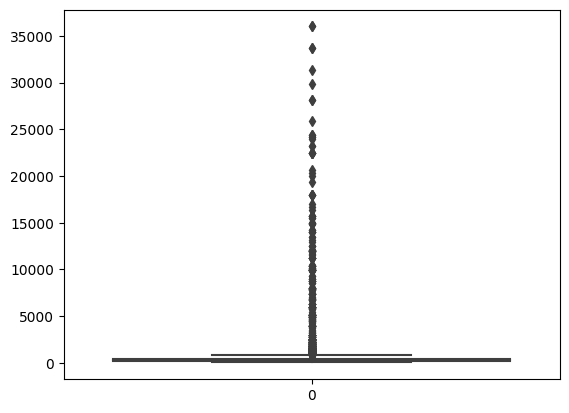

In [42]:
df = df.drop(df[df["Profit_per_order"] < 44].index)

sns.boxplot(df["Profit_per_order"])

In [43]:
df["Product_name"].value_counts()

Product_name
DEEN'S MOZARELLA 200GM            1327
DEEN'S SLICE CHEESE 200GM         1203
DEEN'S CHEDDAR 200GM              1128
DEEN'S CHADDER CHEESE BLOCK 2K    1106
DEEN'S MOZRELLA CHEESE BLOCK       967
DEEN'S PIZZA CHEESE 200GM          810
DEEN'S SLICE CHEESE 1 KG           274
DEENS SLICE 250G                    57
DEEN'S MOZARELLA 400GM              53
DEEN'S CHEDDAR 400GM                41
DEENS MOZRELLA 140G                 10
DEENS CHADDER 140G                   7
DEENS CHADDER 907G                   2
DEENS PIZZA 400G                     2
w4-Dyh SLICE CHEESE 1 KG             1
Name: count, dtype: int64

In [44]:
df["Price_per_PCS"] = df["Price_per_PCS"].astype("int64")
df["Discount_per_piece"] = df["Discount_per_piece"].astype("int64")
df["Has_discount"] = df["Has_discount"].astype("int64")
df["Net_value"] = df["Net_value"].astype("int64")
df["Purchase_price"] = df["Purchase_price"].astype("int64")
df["Profit_per_order"] = df["Profit_per_order"].astype("int64")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6988 entries, 0 to 7294
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                6988 non-null   datetime64[ns]
 1   C_id                6988 non-null   int64         
 2   Customer_name       6988 non-null   object        
 3   Customer_address    6988 non-null   object        
 4   I_code              6988 non-null   int64         
 5   Product_name        6988 non-null   object        
 6   CTN_price           6988 non-null   int64         
 7   CTN                 6988 non-null   int64         
 8   PCS                 6988 non-null   int64         
 9   Total_discount      6988 non-null   int64         
 10  Net_value           6988 non-null   int64         
 11  PCS_in_CTN          6988 non-null   int64         
 12  Price_per_PCS       6988 non-null   int64         
 13  Discount_per_piece  6988 non-null   int64         
 1

## Visualizing the dataset

In [46]:
products_to_drop = ['w4-Dyh SLICE CHEESE 1 KG', 'DEENS CHADDER 140G', 'DEENS CHADDER 907G', 'DEENS MOZRELLA 140G', 'DEENS PIZZA 400G', 'DEENS SLICE 250G']

# Drop the specified products from the DataFrame
df = df[~df['Product_name'].isin(products_to_drop)]

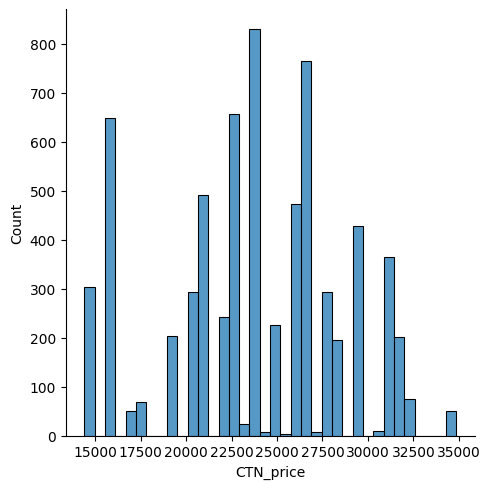

In [47]:
sns.displot(df['CTN_price'])

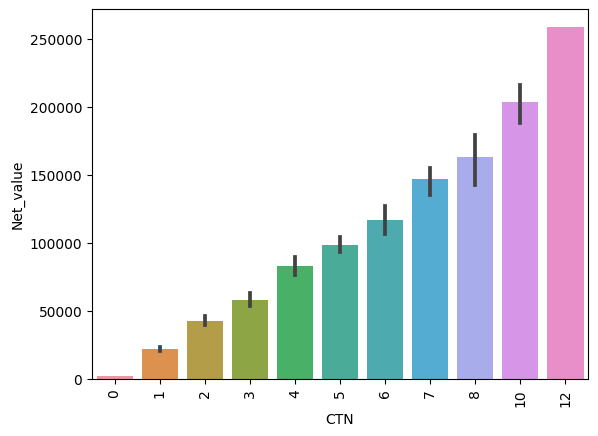

In [48]:
import matplotlib.pyplot as plt
sns.barplot(x=df['CTN'], y=df['Net_value'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Product_name'>

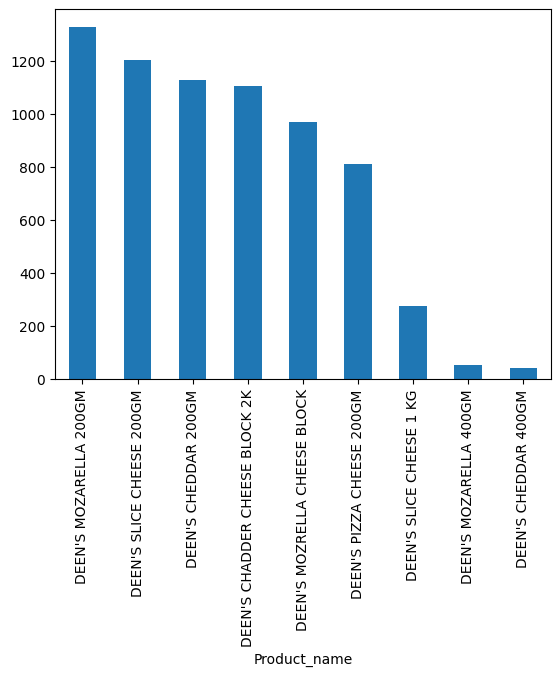

In [49]:
df['Product_name'].value_counts().plot(kind='bar')

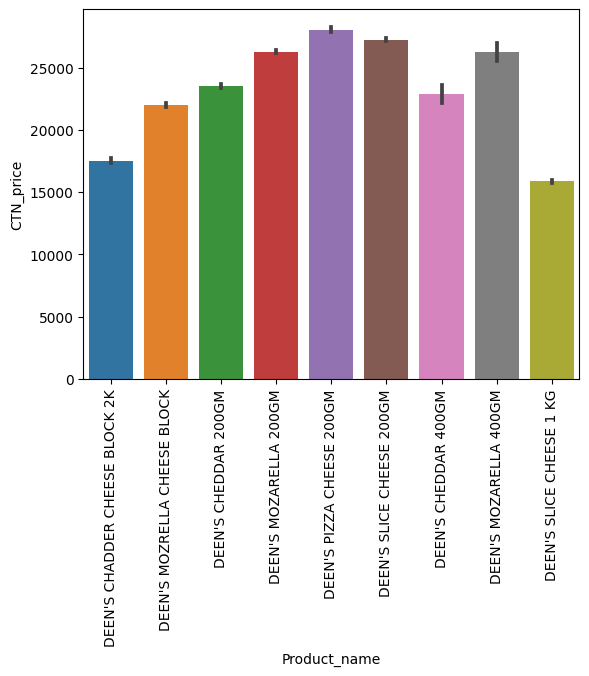

In [50]:
sns.barplot(x=df['Product_name'], y=df['CTN_price'])
plt.xticks(rotation='vertical')
plt.show()

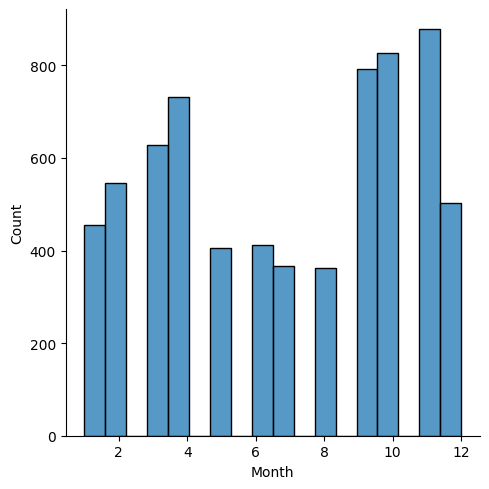

In [51]:
sns.displot(df['Month'])

<Axes: xlabel='Month', ylabel='Net_value'>

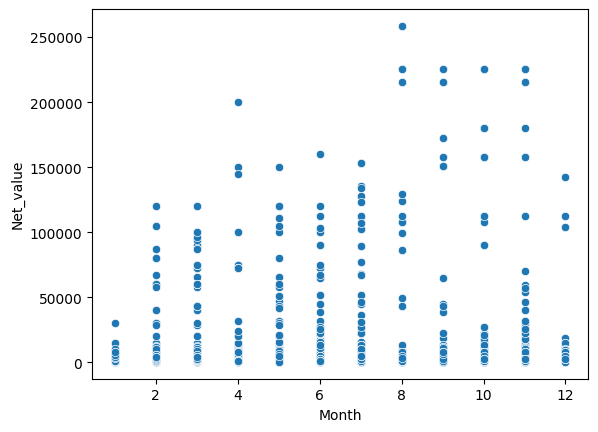

In [52]:
sns.scatterplot(x=df['Month'], y=df['Net_value'])

<Axes: xlabel='CTN_price', ylabel='Net_value'>

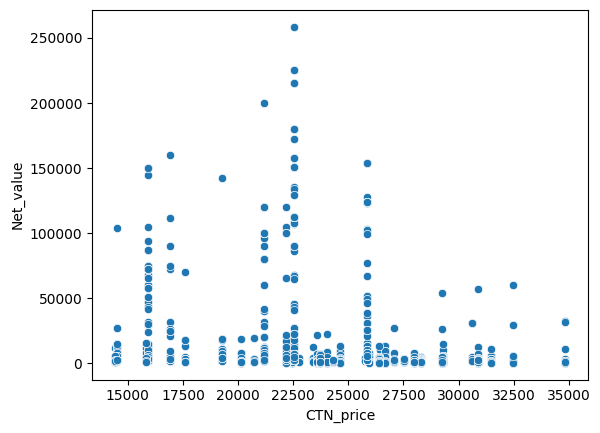

In [53]:
sns.scatterplot(x=df['CTN_price'], y=df['Net_value'])

<Axes: xlabel='Has_discount'>

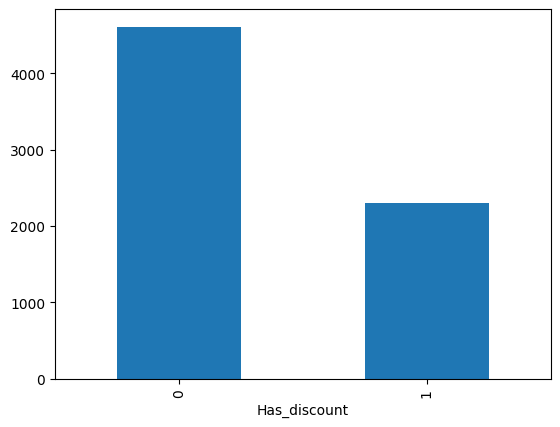

In [54]:
df['Has_discount'].value_counts().plot(kind='bar')

<Axes: xlabel='Has_discount', ylabel='CTN_price'>

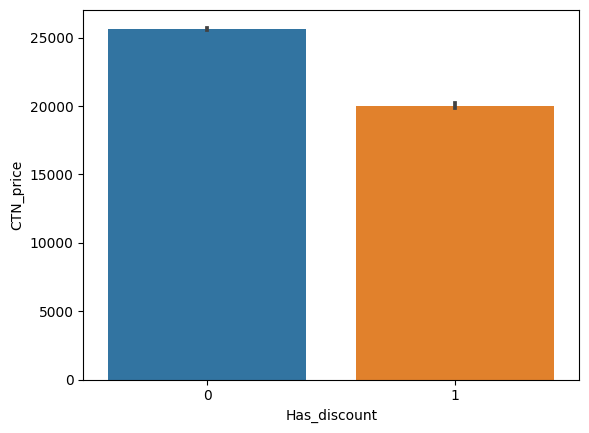

In [55]:
sns.barplot(x=df['Has_discount'], y=df['CTN_price'])

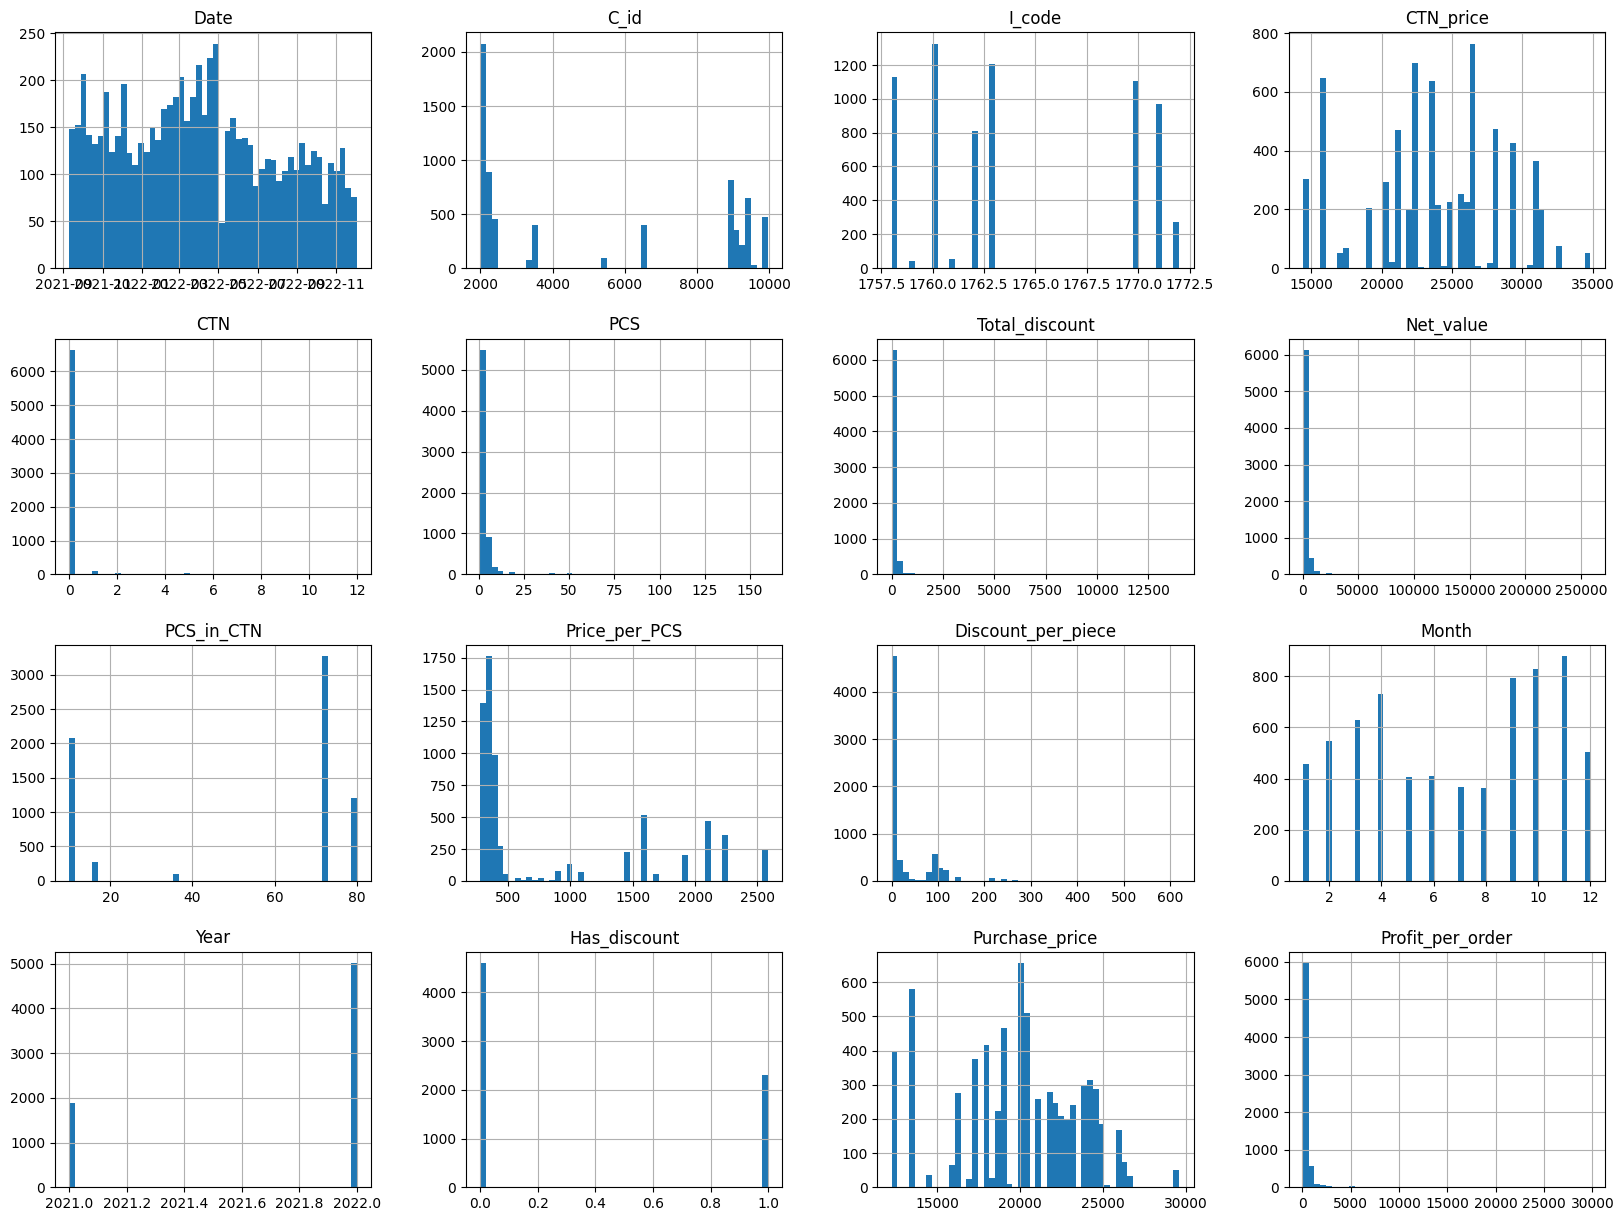

In [56]:
# distribution of the numerical columns
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()


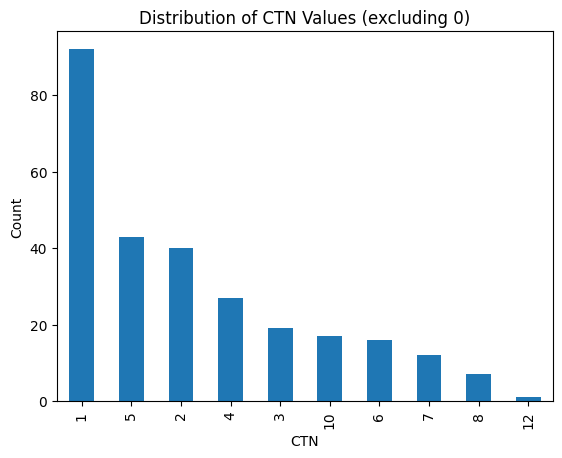

In [57]:
filtered_df = df[df["CTN"] != 0]  # Filter out rows with CTN = 0
filtered_df["CTN"].value_counts().plot(kind='bar')

plt.xlabel("CTN")
plt.ylabel("Count")
plt.title("Distribution of CTN Values (excluding 0)")

plt.show()

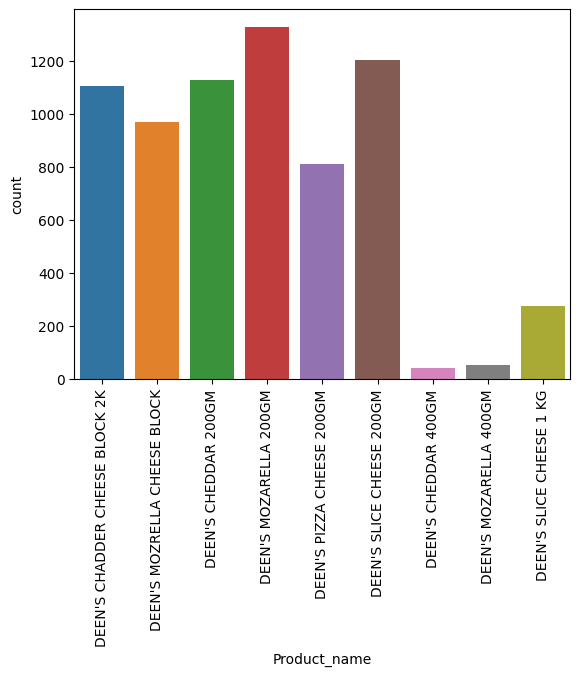

In [58]:
# distribution of the categorical columns
import seaborn as sns

sns.countplot(x='Product_name', data=df)
plt.xticks(rotation=90)
plt.show()


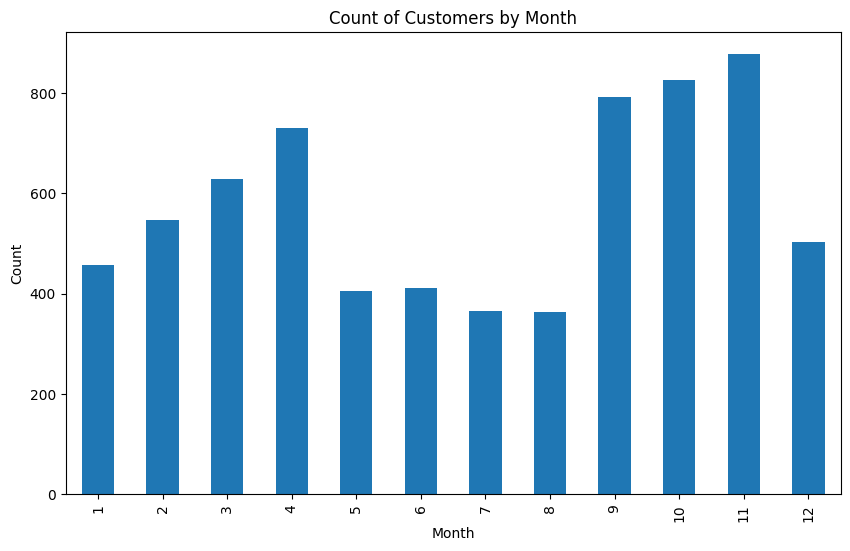

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Customers by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

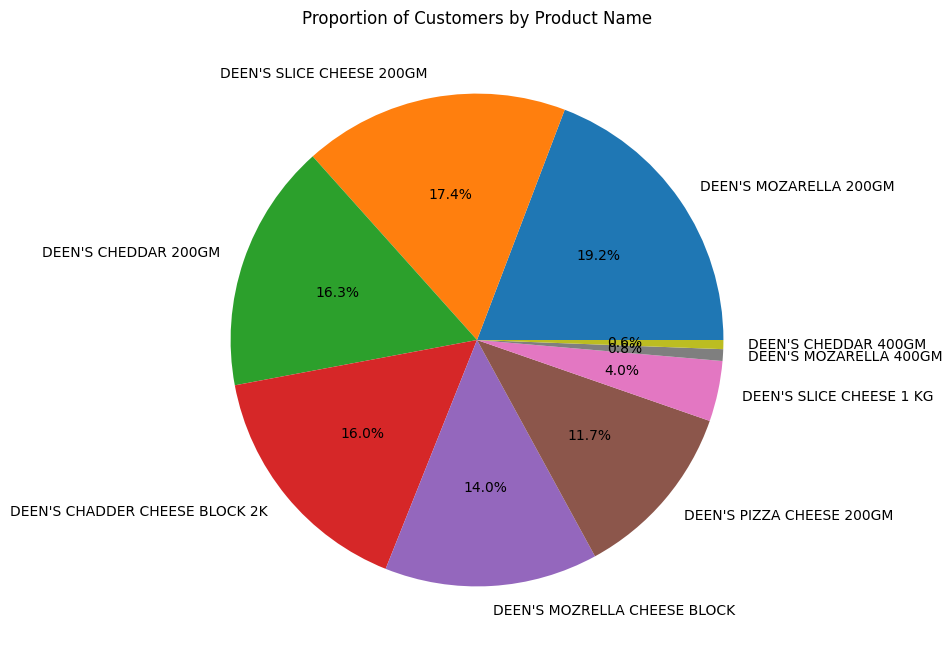

In [60]:
plt.figure(figsize=(8, 8))
df['Product_name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Customers by Product Name')
plt.ylabel('')
plt.show()

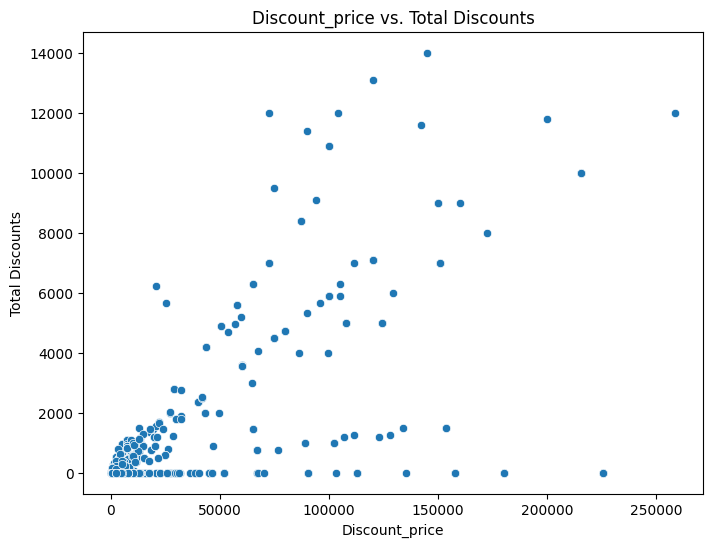

In [61]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Net_value', y='Total_discount')
plt.title('Discount_price vs. Total Discounts')
plt.xlabel('Discount_price')
plt.ylabel('Total Discounts')
plt.show()

In [62]:
df["Net_value"].value_counts()

Net_value
2700    147
3000    141
1353    121
812     120
902     117
       ... 
3116      1
2050      1
950       1
2532      1
2256      1
Name: count, Length: 666, dtype: int64

In [63]:
# df = df[df['Net_value'] <= 160000]

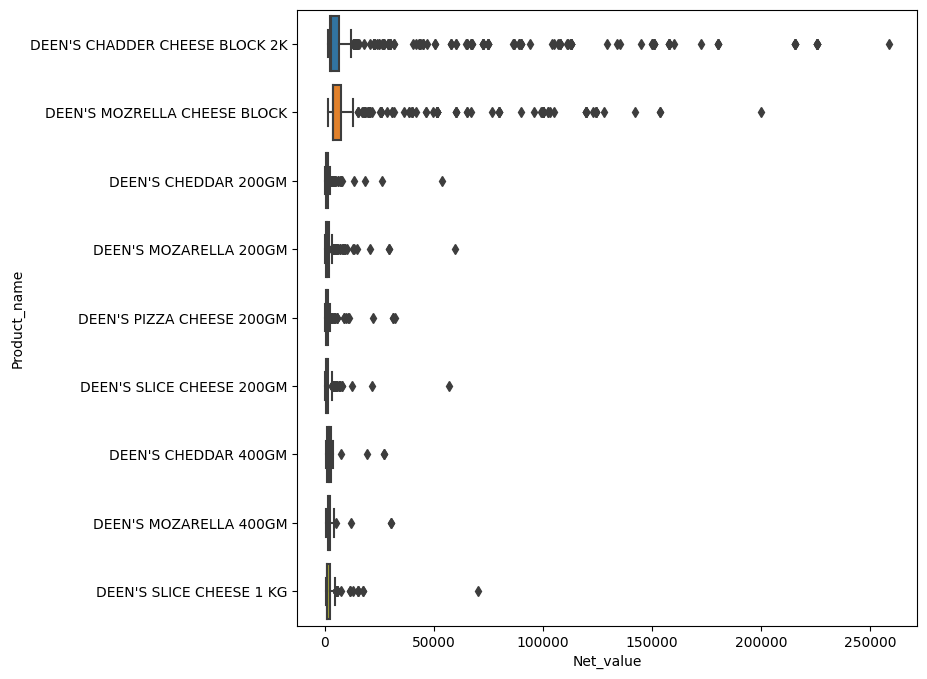

In [64]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, y="Product_name", x="Net_value")
plt.show()

In [65]:
df[(df["Product_name"] == "DEEN'S CHEDDAR 200GM") & (df["Net_value"]>30000)]

,Date,C_id,Customer_name,Customer_address,I_code,Product_name,CTN_price,CTN,PCS,Total_discount,Net_value,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Year,Has_discount,Purchase_price,Profit_per_order
6975,2022-11-11,2374,H.B.K Hypermarket (Pvt.) Ltd.,ring road,1758,DEEN'S CHEDDAR 200GM,29232,2,144,4677,53787,72,406,32,11,2022,1,24840,4107


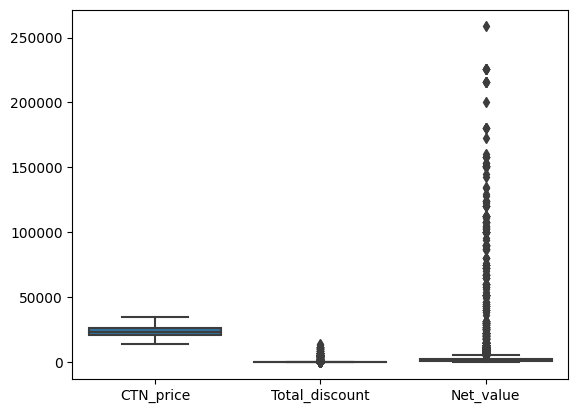

In [66]:
# Check for outliers using box plot
sns.boxplot(data=df[["CTN_price", "Total_discount", "Net_value"]])
plt.show()

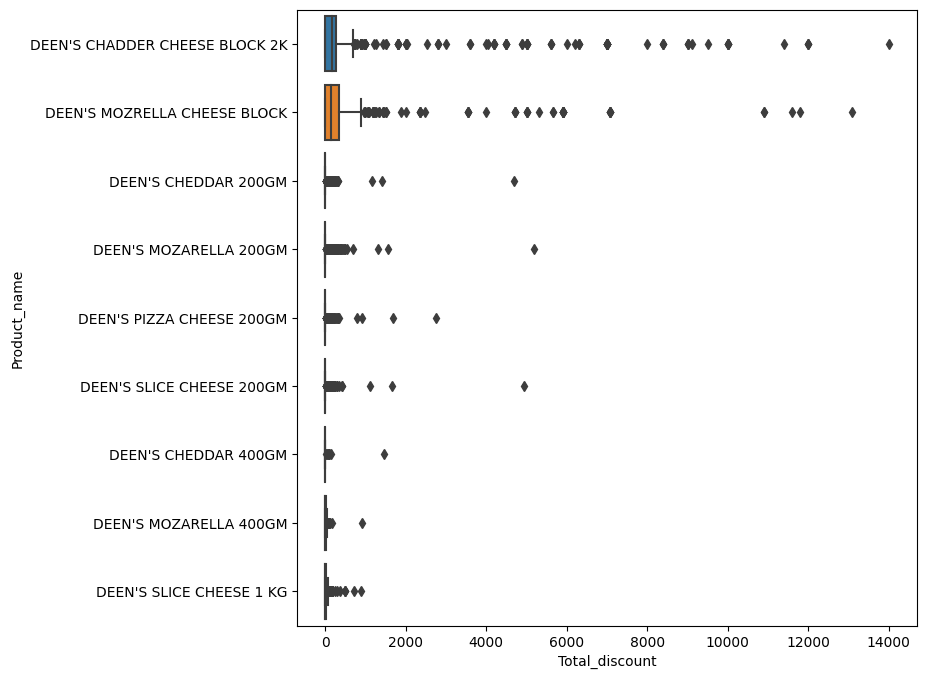

In [67]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, y="Product_name", x="Total_discount")
plt.show()

In [68]:
df[(df["Product_name"] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df["Total_discount"]>20000)]

,Date,C_id,Customer_name,Customer_address,I_code,Product_name,CTN_price,CTN,PCS,Total_discount,Net_value,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Year,Has_discount,Purchase_price,Profit_per_order


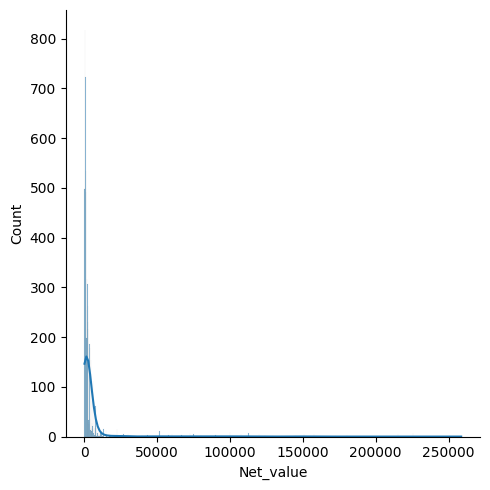

In [69]:
sns.displot(df['Net_value'], kde=True)

In [70]:
df["Customer_name"].value_counts()

Customer_name
PIZZA FLAME        467
SNACK FOOD CAFE    253
AL MAIDA 2         187
ARYANA S/S         171
TOP TOWN           147
                  ... 
ZAHID MOHMAND        1
SMOKE & GRILL        1
H H MART             1
INSAF BAWARCHI       1
JUICE POINT          1
Name: count, Length: 194, dtype: int64

In [71]:
count_above_150000 = df[df['Net_value'] > 160000]['Net_value'].count()
print(count_above_150000)

19


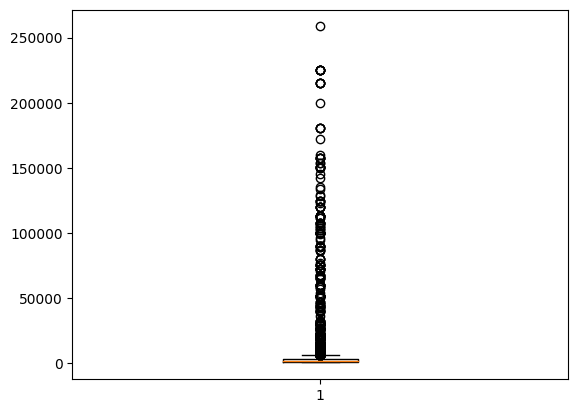

In [72]:
#Check outliers
plt.boxplot(df['Net_value'])
plt.show()

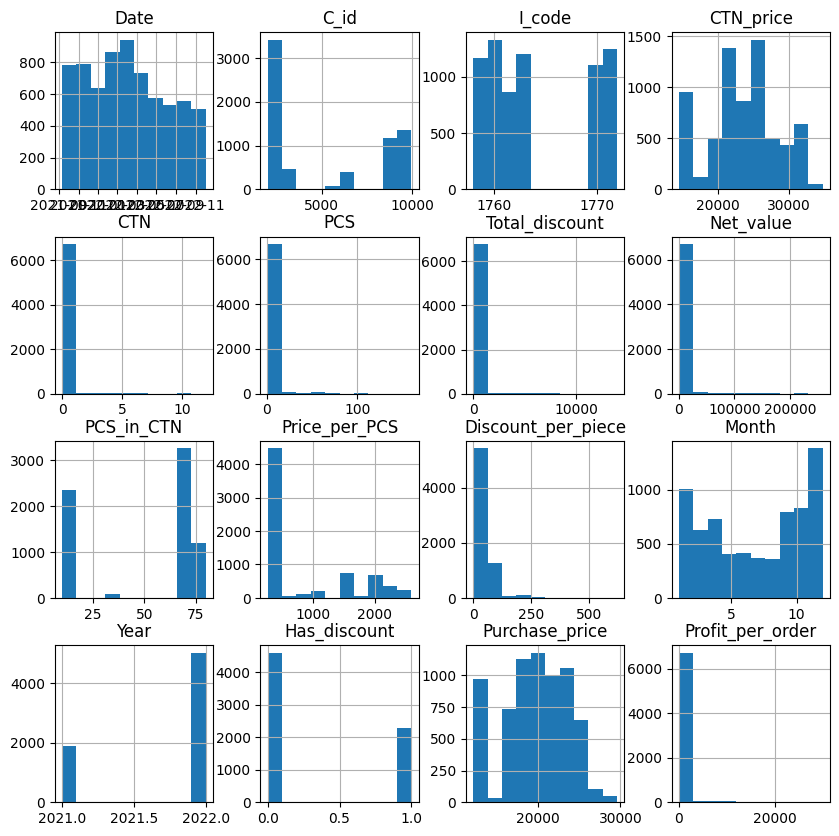

In [73]:
# Visualizing the distribution of the data using histograms
df.hist(figsize=(10,10))
plt.show()

In [74]:
# # Visualizing the relationship between features using scatter plots
# sns.pairplot(df)
# plt.show()

### Get insights from data

In [75]:
# Identify the top-selling products
top_products = df.groupby(['I_code', 'Product_name'])['PCS'].sum().reset_index().sort_values('PCS', ascending=False).head(10)
print(top_products)

   I_code                    Product_name   PCS
6    1770  DEEN'S CHADDER CHEESE BLOCK 2K  8904
2    1760          DEEN'S MOZARELLA 200GM  5414
5    1763       DEEN'S SLICE CHEESE 200GM  4991
7    1771    DEEN'S MOZRELLA CHEESE BLOCK  4796
0    1758            DEEN'S CHEDDAR 200GM  4073
4    1762       DEEN'S PIZZA CHEESE 200GM  2678
8    1772        DEEN'S SLICE CHEESE 1 KG   684
3    1761          DEEN'S MOZARELLA 400GM   234
1    1759            DEEN'S CHEDDAR 400GM   232


In [76]:
#Analyze the discounts
discount_analysis = df.groupby('Product_name').agg({'Total_discount': 'mean', 'Net_value': 'mean', 'PCS': 'sum'}).reset_index()
print(discount_analysis)

                     Product_name  Total_discount     Net_value   PCS
0  DEEN'S CHADDER CHEESE BLOCK 2K      585.284810  14997.635624  8904
1            DEEN'S CHEDDAR 200GM       17.747340   1288.093972  4073
2            DEEN'S CHEDDAR 400GM       49.317073   3677.707317   232
3          DEEN'S MOZARELLA 200GM       28.155237   1620.112283  5414
4          DEEN'S MOZARELLA 400GM       35.754717   3302.547170   234
5    DEEN'S MOZRELLA CHEESE BLOCK      450.210962  10847.587384  4796
6       DEEN'S PIZZA CHEESE 200GM       19.038272   1400.997531  2678
7        DEEN'S SLICE CHEESE 1 KG       42.518248   2441.021898   684
8       DEEN'S SLICE CHEESE 200GM       19.528678   1399.097257  4991


In [77]:
# Identify the most profitable customers
top_customers = df.groupby(['Customer_name', 'Customer_address'])[['Net_value', 'PCS']].sum().reset_index().sort_values('PCS', ascending=False).head(10)
print(top_customers)


                     Customer_name           Customer_address  Net_value   PCS
41                    CHIEF BURGER            UNIVERSITY ROAD   13629475  6663
95                     JAN'S DAILY                       TOWN    2953450  1550
145                    PIZZA FLAME             IBRAHIM MARKET    2135135  1234
9             AL HAMRA SUPER STORE                DILZAQ ROAD     311807   866
18                      ARYANA S/S               Nawab Market     303236   787
70   H.B.K Hypermarket (Pvt.) Ltd.                  ring road     376621   744
177                SNACK FOOD CAFE              ZANGAL MARKET    1031305   596
85              IMTIAZ SUPER STORE                  RING ROAD     395284   541
185                       TOP TOWN  TORANGZAI MARKET HAYATBAD     186115   513
55                    FAISAL STORE          Yousaf Zai Market     188027   504


In [78]:
# Analyze the pricing strategy
price_analysis = df.groupby('Product_name').agg({'CTN_price': 'mean', 'Net_value': 'mean', 'PCS': 'sum'}).reset_index()
print(price_analysis)

                     Product_name     CTN_price     Net_value   PCS
0  DEEN'S CHADDER CHEESE BLOCK 2K  17529.068716  14997.635624  8904
1            DEEN'S CHEDDAR 200GM  23530.681738   1288.093972  4073
2            DEEN'S CHEDDAR 400GM  22845.951220   3677.707317   232
3          DEEN'S MOZARELLA 200GM  26283.202713   1620.112283  5414
4          DEEN'S MOZARELLA 400GM  26218.867925   3302.547170   234
5    DEEN'S MOZRELLA CHEESE BLOCK  22017.063082  10847.587384  4796
6       DEEN'S PIZZA CHEESE 200GM  28036.608642   1400.997531  2678
7        DEEN'S SLICE CHEESE 1 KG  15872.116788   2441.021898   684
8       DEEN'S SLICE CHEESE 200GM  27249.808811   1399.097257  4991


In [79]:
#Analyze customer behavior
customer_behavior = df.groupby(['Customer_name', 'Customer_address']).agg({'CTN': 'sum', 'PCS': 'sum'}).reset_index()
customer_behavior['Items_per_carton'] = customer_behavior['PCS'] / customer_behavior['CTN']
print(customer_behavior)

            Customer_name            Customer_address  CTN  PCS   
0                4 SEASON                       SADAR    0  251  \
1              7 SEAZ S S         KHYBER SUPER MARKET    0   23   
2                AD STORE    Colonel Sher Khan Market    0   90   
3               ADNAN G/S                M ZAI MARKET    0   48   
4     ADNAN GENERAL STORE                   ARY BAZAR    0    2   
..                    ...                         ...  ...  ...   
194           WARSAK MALL                 WARSAK ROAD    0   36   
195  YOUNAS GENERAL STORE                  GUL BERG 2    2  397   
196             ZAFAR G/S  HAYATABAD TURANGZAI MARKET    0  253   
197         ZAHID MOHMAND                      NOTHIA    0    1   
198             ZARI MART                     GULBERG    0  202   

     Items_per_carton  
0                 inf  
1                 inf  
2                 inf  
3                 inf  
4                 inf  
..                ...  
194               inf  
195

In [80]:
#Identify correlations
corr_matrix = df[['CTN_price', 'CTN', 'PCS', 'Total_discount', 'Net_value']].corr()
print(corr_matrix)

                CTN_price       CTN       PCS  Total_discount  Net_value
CTN_price        1.000000 -0.098062 -0.020353       -0.173772  -0.103755
CTN             -0.098062  1.000000  0.886701        0.767250   0.977123
PCS             -0.020353  0.886701  1.000000        0.712579   0.891965
Total_discount  -0.173772  0.767250  0.712579        1.000000   0.697535
Net_value       -0.103755  0.977123  0.891965        0.697535   1.000000


### Vizualization

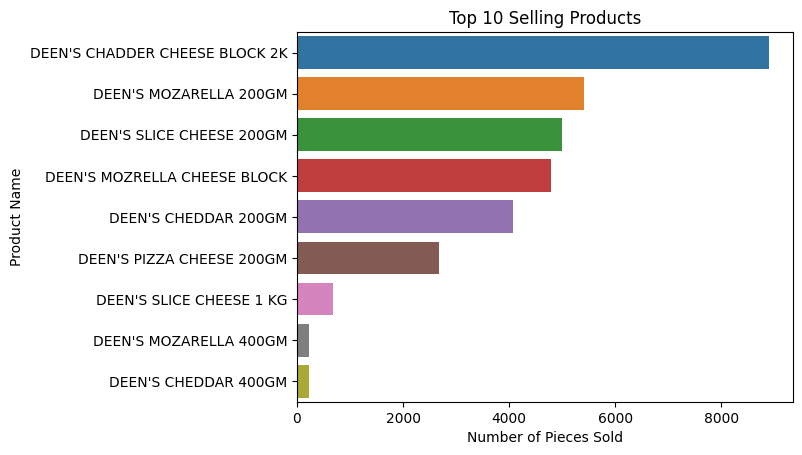

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

top_products = df.groupby(['I_code', 'Product_name'])['PCS'].sum().reset_index().sort_values('PCS', ascending=False).head(10)

sns.barplot(x='PCS', y='Product_name', data=top_products)
plt.title('Top 10 Selling Products')
plt.xlabel('Number of Pieces Sold')
plt.ylabel('Product Name')
plt.show()

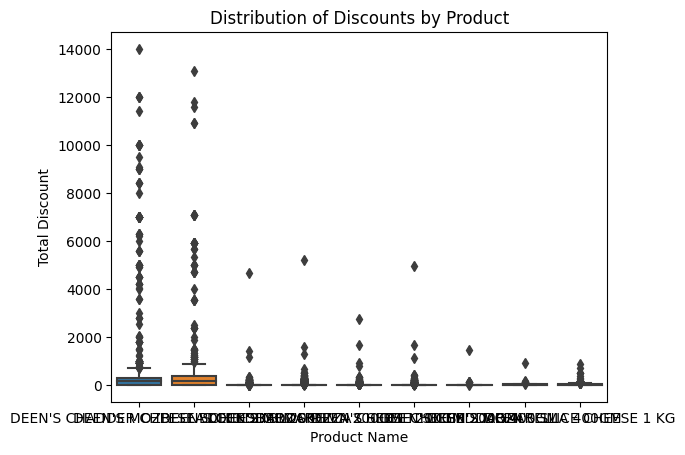

In [82]:
sns.boxplot(x='Product_name', y='Total_discount', data=df)
plt.title('Distribution of Discounts by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Discount')
plt.show()


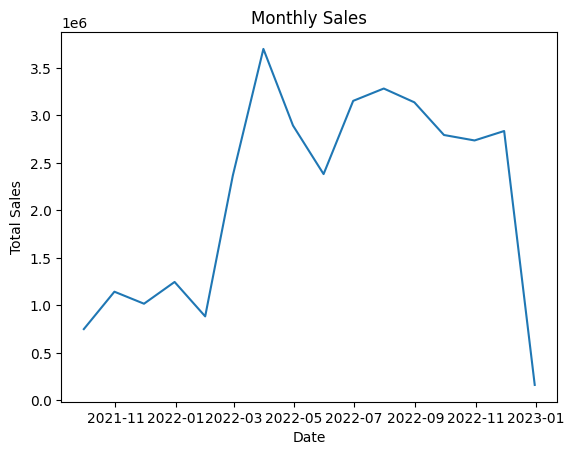

In [83]:
# Line plot to show sales over time
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Net_value': 'sum'}).reset_index()

sns.lineplot(x='Date', y='Net_value', data=monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


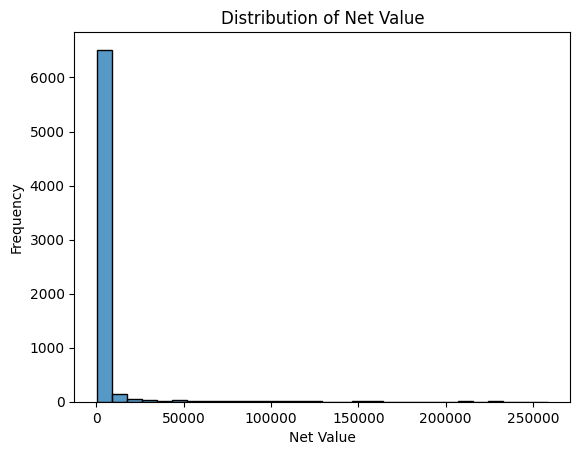

In [84]:
# Histogram to show the distribution of prices
sns.histplot(x='Net_value', data=df, bins=30)
plt.title('Distribution of Net Value')
plt.xlabel('Net Value')
plt.ylabel('Frequency')
plt.show()

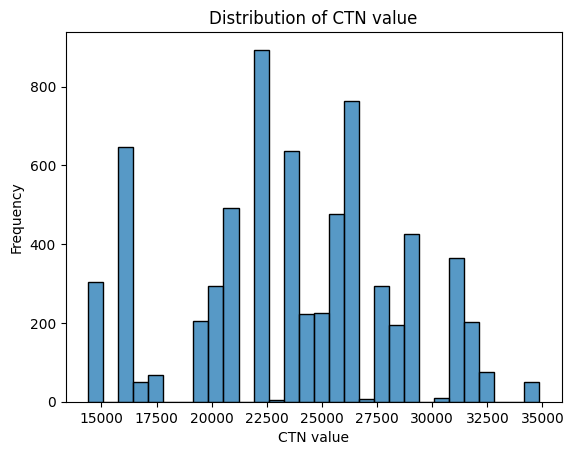

In [85]:
# Histogram to show the distribution of prices
sns.histplot(x='CTN_price', data=df, bins=30)
plt.title('Distribution of CTN value')
plt.xlabel('CTN value')
plt.ylabel('Frequency')
plt.show()


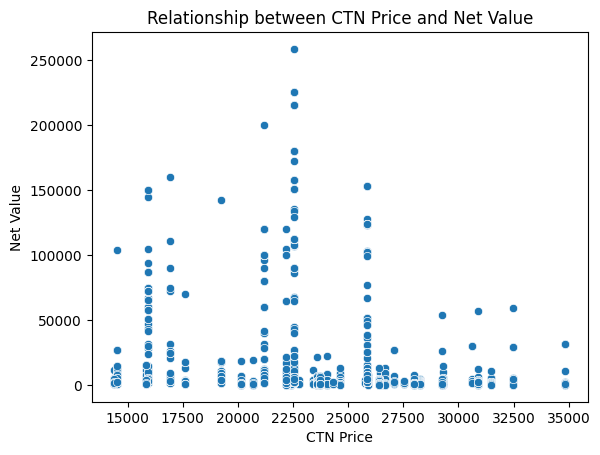

In [86]:
# Scatter plot to show the relationship between original price and discount
sns.scatterplot(x='CTN_price', y='Net_value', data=df)
plt.title('Relationship between CTN Price and Net Value')
plt.xlabel('CTN Price')
plt.ylabel('Net Value')
plt.show()


In [87]:
num_customers = len(df['Customer_name'].unique())

print(f"Number of unique customers: {num_customers}")

Number of unique customers: 194


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9084\893052018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Net_value"])


<Axes: xlabel='Net_value', ylabel='Density'>

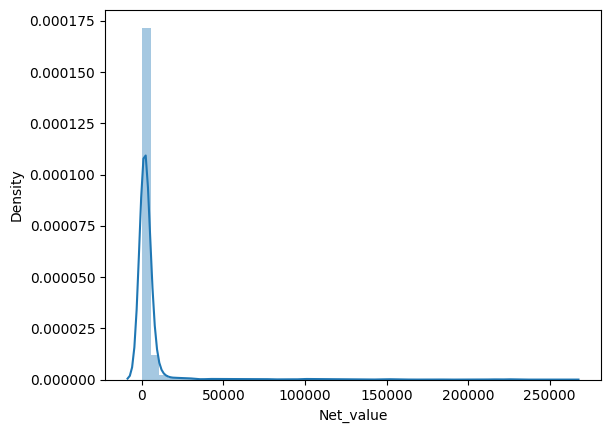

In [88]:
sns.distplot(df["Net_value"])

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9084\3941368295.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["Net_value"]))


<Axes: xlabel='Net_value', ylabel='Density'>

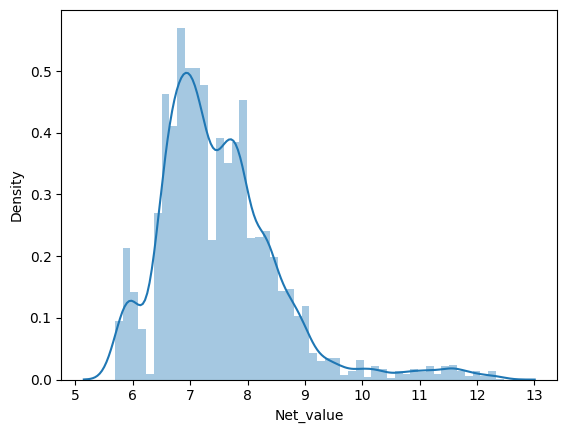

In [89]:
sns.distplot(np.log(df["Net_value"]))

## Modeling 

### Feature Engineering

#### Creating Day column

In [90]:
# Extract the day from the 'Date' column and assign it to the 'Day' column
df['Day'] = df['Date'].dt.day

#### Creating new column Month_order (Total no. of orders in a month)

In [91]:
product_names = [
    "DEEN'S CHADDER CHEESE BLOCK 2K",
    "DEEN'S MOZRELLA CHEESE BLOCK",
    "DEEN'S CHEDDAR 200GM",
    "DEEN'S MOZARELLA 200GM",
    "DEEN'S PIZZA CHEESE 200GM",
    "DEEN'S SLICE CHEESE 200GM",
    "DEEN'S CHEDDAR 400GM",
    "DEEN'S MOZARELLA 400GM",
    "DEEN'S SLICE CHEESE 1 KG"
]

date_ranges = [
    ('2021-09-01', '2021-09-30'),
    ('2021-10-01', '2021-10-31'),
    ('2021-11-01', '2021-11-30'),
    ('2021-12-01', '2021-12-31'),
    ('2022-01-01', '2022-01-31'),
    ('2022-02-01', '2022-02-28'),
    ('2022-03-01', '2022-03-31'),
    ('2022-04-01', '2022-04-30'),
    ('2022-05-01', '2022-05-31'),
    ('2022-06-01', '2022-06-30'),
    ('2022-07-01', '2022-07-31'),
    ('2022-08-01', '2022-08-31'),
    ('2022-09-01', '2022-09-30'),
    ('2022-10-01', '2022-10-31'),
    ('2022-11-01', '2022-12-03')
]

# Convert the 'Date' column to datetime type if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column 'month_order' and initialize it with zeros
df['month_order'] = 0

# Iterate over each product name and date range
for product_name in product_names:
    for start_date, end_date in date_ranges:
        # Create a mask for the specified date range
        date_mask = (df['Date'].between(start_date, end_date))
        
        # Filter the DataFrame for the specified product and date range
        filtered_df = df[(df['Product_name'] == product_name) & date_mask]
        
        # Calculate the total number of PCS ordered
        total_pcs_ordered = filtered_df['PCS'].sum()
        
        # Update the 'month_order' column for the specific product and date range
        df.loc[(df['Product_name'] == product_name) & date_mask, 'month_order'] = total_pcs_ordered

#### Creating new Column week_order (Total no. of pieces ordered in a week)

In [92]:
# Convert the 'Date' column to datetime type if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column 'Week' and extract the week number within each month
df['Week'] = df['Date'].dt.isocalendar().week

# Iterate over each month and update the week numbers accordingly
for month in df['Month'].unique():
    mask = (df['Month'] == month)
    df.loc[mask, 'Week'] = df.loc[mask, 'Week'].rank(method='dense')

In [93]:
# Define the list of specific product names
product_names = ["DEEN'S CHADDER CHEESE BLOCK 2K", "DEEN'S MOZRELLA CHEESE BLOCK",
                 "DEEN'S CHEDDAR 200GM", "DEEN'S MOZARELLA 200GM",
                 "DEEN'S PIZZA CHEESE 200GM", "DEEN'S SLICE CHEESE 200GM",
                 "DEEN'S CHEDDAR 400GM", "DEEN'S MOZARELLA 400GM",
                 "DEEN'S SLICE CHEESE 1 KG"]

# Create a new column 'week_order' and initialize it with 0
df['week_order'] = 0

# Iterate over each product name
for product_name in product_names:
    # Filter the dataframe for the specific product
    filtered_df = df[df['Product_name'] == product_name]

    # Group the filtered data by week and calculate the sum of PCS ordered
    weekly_pcs_ordered = filtered_df.groupby(['Year', 'Month', 'Week'])['PCS'].sum()

    # Update the 'week_order' column with the sum of PCS within each week for the specific product
    df.loc[df['Product_name'] == product_name, 'week_order'] = df.loc[df['Product_name'] == product_name].groupby(['Year', 'Month', 'Week'])['PCS'].transform('sum')

# Sort the dataframe by date
df = df.sort_values('Date')

# Reset the index
df = df.reset_index(drop=True)

### Creating Season cloumn

In [94]:
# Define a function to map the month to the corresponding season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4]:
        return 'Spring'
    elif month in [5, 6, 7, 8, 9]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to the 'Month' column and assign the result to the 'Season' column
df['Season'] = df['Month'].apply(get_season)


In [95]:
# Create a dictionary to map seasons to numerical values
season_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}

# Map the seasons to numerical values and assign the result to a new column 'Season_encoded'
df['Season_encoded'] = df['Season'].map(season_mapping)

## Predicting Net value of the oreder

In [96]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Select the features (X) and the target variable (y)
# X = df[['I_code', 'Day', 'Month', 'Year', 'PCS', 'Has_discount']]
# y = df['Net_value']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Initialize the random forest regressor model
# model = RandomForestRegressor()

# # Define the hyperparameters to tune and their possible values
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(model, param_grid, cv=5)

# # Fit the model to the training data using GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best model and its hyperparameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Make predictions on the testing data using the best model
# y_pred = best_model.predict(X_test)

# # Calculate evaluation metrics using the best model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Print the best hyperparameters and evaluation metrics
# print("Best Hyperparameters:", best_params)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R^2) Score:", r2)


In [97]:
# This model can give the estimated net_value of the order
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Select the features (X) and the target variable (y)
X = df[['I_code', 'Day', 'Month', 'Year', 'PCS', 'Has_discount']]
y = df['Net_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([112332.3  ,    310.   ,   1353.   , ...,   1053.71 ,   1230.   ,
         6041.475])

## Evaluating

In [98]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 10005488.28553692
Root Mean Squared Error (RMSE): 3163.1453152735367
R-squared (R^2) Score: 0.9695053495279445


In [99]:
# Assuming you have already trained the model and have new data for prediction
new_data = np.array([[1763, 4, 3, 2021, 3, 0]])

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print("Predicted Net Value:", predictions)

Predicted Net Value: [885.]


c:\Users\Toshiba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Forecasting demand of pieces for a Month

In [100]:
# This model can predict the estimated quantity to be ordered 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Select the features (X) and the target variable (y)
X = df[['I_code','Day', 'Week', 'Month', 'Year', 'Season_encoded']]
y = df['month_order']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([874., 273., 321., ..., 165.,  81., 343.])

### Evaluating

In [101]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 7.757985817655572
Root Mean Squared Error (RMSE): 2.7853161073127
R-squared (R^2) Score: 0.9998530269047715


In [102]:
new_data = np.array([[1763,6, 3, 6, 2022, 2]])  # Replace with your actual new data

# Make predictions on the new data
pred = model.predict(new_data)

# Print the predictions
print("Predicted month orders :", pred)

Predicted month orders : [208.4]


c:\Users\Toshiba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Forecasting demand of pieces for a week

In [103]:
# This model can predict the estimated quantity to be ordered 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Select the features (X) and the target variable (y)
X = df[['I_code', 'Day', 'Week', 'Month', 'Year', 'Season_encoded']]
y = df['week_order']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([166.  ,  60.61,  61.  , ...,  88.  ,  16.97,  89.1 ])

### Evaluating

In [104]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 63.783405788712
Root Mean Squared Error (RMSE): 7.986451388990733
R-squared (R^2) Score: 0.983855370184079


In [105]:
# Assume you have new input data stored in a variable called `new_data`
new_data = [[1771, 1, 3, 2, 2022, 2]]

# Make predictions on the scaled input data
predictions = model.predict(new_data)

# Print the predicted values
print("Predicted week orders :", predictions)

Predicted week orders : [121.95]


c:\Users\Toshiba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Predicting what will be the profit for specific product's order

In [106]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split, GridSearchCV

# # Convert the features and target variable to numeric data types
# X = df[['I_code', 'PCS', 'Day', 'Month', 'Year', 'Has_discount']]
# y = df['Profit_per_order']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a RandomForestRegressor model
# model = RandomForestRegressor()

# # Define the hyperparameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Fit the best model on the training data
# best_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = best_model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Best Hyperparameters:", best_params)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R^2) Score:", r2)


In [107]:
# This model can give the estimated profit on a order
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Convert the features and target variable to numeric data types
X = df[['I_code', 'PCS', 'Day', 'Month', 'Year', 'Has_discount',]]
y = df['Profit_per_order']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([11108.23333333,    72.        ,   340.        , ...,
         508.8       ,   774.        ,   715.08      ])

In [108]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 613632.2593854727
Root Mean Squared Error (RMSE): 783.3468321155532
R-squared (R^2) Score: 0.8039487813743227


In [109]:
# Assume you have new input data stored in a variable called `new_data`
new_data = [[1771, 1, 3, 2, 2022, 0]]

# Make predictions on the scaled input data
predictions = model.predict(new_data)

# Print the predicted values
print("Predicted Profit: ", predictions)

Predicted Profit:  [315.42]


c:\Users\Toshiba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [110]:
# # Assuming you have a dataset stored in a Pandas DataFrame
# dataset = df

# # Save the dataset to a CSV file
# dataset.to_csv('Updated.csv', index=False)

In [111]:
import joblib

In [112]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Train the model and assign it to the 'model' variable

# ...

# Save the model using joblib
joblib.dump(model, 'model1.joblib')


['model1.joblib']

In [113]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Train the model and assign it to the 'model' variable

# ...

# Save the model using joblib
joblib.dump(model, 'model2.joblib')


['model2.joblib']

In [114]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Train the model and assign it to the 'model' variable

# ...

# Save the model using joblib
joblib.dump(model, 'model3.joblib')


['model3.joblib']

In [115]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Train the model and assign it to the 'model' variable

# ...

# Save the model using joblib
joblib.dump(model, 'model4.joblib')


['model4.joblib']